Link to kaggle dataset: https://www.kaggle.com/andrewmvd/data-scientist-jobs from user Larxel. Downloaded on 30/06 at roughly 9:15am.

Link to Stackoverflow dataset: https://insights.stackoverflow.com/survey - downloaded 2020 survey results.


### Idea
Compare Data Scientist and Data Analyst role profiles by required skills

### Reasoning
For people at the beginning of their career in data, it can be difficult to understand the difference between data scientist and data analyst roles. What is the day to day like? How much coding will I be doing? Having recently applied for jobs again myself, I find that the definition varies a lot between companies. Some, one might even argue, advertise using the "data scientist" title because it sounds more "sexy". So what is the difference? How clear-cut is it? And what skills are needed to land a job?

A lot of what you do in a job day to day is defined by the technology you work with. The technology is also an indicator for how much code you will actually be writing and how "technical" a role is. I am therefore looking at the technology that's being used by data analysts versus data scientists to understand where the differences lie. I will be looking at two data sources: First, I will look at job descriptions to understand what skills are crucial to put on your CV to score a job in either field and how this differs. Secondly, I will have a look at the stackoverflow developer survey 2020 to understand which tools data analysts and data scientists use most and are planning to learn. 
Between these two analyses, we should be able to see the differences between Data Analyst and Data Scientist jobs. Also, we should be able to see if the reality of the jobs matches the job descriptions.

##### Questions:
* How distinctive are these roles from each other and from other roles in the field? 
    
Looking only at the roles of Data Analysts and Data Scientists, 81% of people in the field say they are only one of the two. 19% state they are both. THis looks like people working in these roles seem to distinguish them quite clearly from one another. 

However, only a small share of Data Analysts and Data Scientists does not also consider themselves as working in another role. Data Analysts declare on average more other roles than Data Scientists. Those who state they are Data Analysts (but not Data Scientists) list on average 5.1 roles, whereas those who state they are Data Scientists (but not Data Analysts) list 3.9 roles.

Data Analysts often also work as back-end Developers (57%), full-stack Developers (48%) or Database Administrators (38%). Only in 5th place with 31% comes 'Data Scientist or Machine Learning Specialist'.
Data Scientists similarly also work as back-end Developers (47%) and full-stack Developers (37%). In third place comes 'Data or business analyst' with 32%.

The biggest differences between Data Analysts and Data Scientists are for the roles Scientist and Academic Researcher (Data Scientist +12%pts) and Database Administrator, front-end Developer and desktop and enterprise applications Developer (Data Analyst +20%pts, +14%pts, +13%pts)

The data unfortunately provides no insights into which role respondents consider their "primary" role. It is therefore quite possible that many consider themselves as Data Analysts, because data analysis is part of another, *primary* role they fulfil (likely a Developer role). Data Scientist, in comparison, seems to be somewhat more of a "standalone" role.

What does this mean for aspiring Data Analysts? Will they always have to wear multiple hats and even bring developer skills to the table? Or is the stackoverflow data biased towards developers who also do data analysis and does not actually capture many "pure" Data Analysts? Based on my own recent job search, the latter seems more likely. 

> Data Analysis skills are important in many roles

> Data Scientist is a more "standalone" role, at least in the Stackoverflow/Developer world

* What tools are Data Analysts using versus what tools are Data Scientists using (Stackoverflow)?

Data Analysts are stronger on the SQL side, wherras DS use more Python (+ libraries)

* What are they each looking to learn (Stackoverflow)?

What they want to use in the next year largely reflects what they are already using

* What skills are required according to job descriptions (Kaggle)?


### Other questions
* Do DS or DA desire to use more new tools next year?
* Do people in smaller companies have to take on more different roles?
* Do requirements become more similar or more different the more senior a role gets?
* Is job satisfaction higher amongst Data Scientists?
* Do Data Analysts try to learn tools that are used more by data scientists?
* Which other roles do the DSs and DAs usually also fulfill? >> Done, could potentially make a nicer chart

### Other information 
Using the list of tech and tools from stackoverflow survey plus some popular BI tools (list retrieved from....) and adding MS office applications.


In [249]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
os.chdir(r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data")

In [3]:
pd.set_option("display.max_columns", None)

## Reading in data

In [294]:
dfk = pd.read_csv(r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data\kaggle_ds_jobs\DataScientist.csv")

In [4]:
dfs = pd.read_csv(r"stackoverflow_survey\survey_results_public.csv")

# Part 1 - The Kaggle Job Data
## Looking at data

In [175]:
dfk.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [176]:
dfk.shape

(3909, 17)

## Defining functions

## Creating comprehensive list of tools to look for
Sources: 
* Tools listed in Stackoverflow survey
* Top BI, statistical software & data visualisation tools as found online: (Note: There is a plethora of tools out there. After some research I came up with the list below which contains, to my knowledge, all currently highly popular tools plus some more I am myself unfamiliar with. In the analysis, any tools that have low incidence will be removed)
    * https://www.datapine.com/articles/best-bi-tools-software-review-list
     * Datapine
     * SAS
     * Clear Analytics
     * SAP
     * Domo
     * Metric Insights
     * Zoho Analytics
     * Microstrategy
     * Gooddata
     * Cognos Analytics (by IBM)
     * QlikView
     * Yellowfin
    * https://towardsdatascience.com/top-5-bi-tools-that-you-must-use-for-data-visualization-7ccc2a852bd3
     * Qlik Sense
     * Tableau
     * Power BI (by Microsoft)
     * SAP Hana
    * https://www.cio.com/article/3322749/top-business-intelligence-bi-tools.html
     * Board (remove as potentially confusing word)
     * Dundas BI
     * MicroStrategy
     * Oracly Analytics Cloud
     * Sisense
     * Tibco
    * https://www.forbes.com/sites/bernardmarr/2020/05/22/the-9-best-analytics-tools-for-data-visualization-available-today/?sh=36ebb06a4743
     * Infogram
     * Google Charts
     * Paraview
     * Looker
    * https://uk.pcmag.com/cloud-services/83744/the-best-data-visualization-tools-for-2020
     * Google Analytics
    * https://mopinion.com/business-intelligence-bi-tools-overview/
     * Oracle BI
    * https://www.trustradius.com/business-intelligence-bi
     * SAP Analytics Cloud
    * Selection of https://www.capterra.com/statistical-analysis-software/
     * SPSS
     * Stata
     * Minitab
     * Matlab
     * Alteryx
     * Google DataStudio
* Excel
* Adding other names of tools in list, e.g. abbreviations of names (e.g. GCP = Google Cloud Platform)

In [295]:
online_research_list = ['Datapine',
                   'SAS',
                   'Clear Analytics', 
                   'SAP', 
                   'Domo', 
                   'Metric Insights', 
                   'Zoho Analytics',
                   'Microstrategy',
                   'GoodData',
                   'Cognos Analytics',
                  'QlikView',
                  'Yellowfin',
                  'Qlik Sense',
                  'Tableau',
                  'Power BI',
                  'SAP Hana',
                  'Dundas BI',
                  'MicroStrategy',
                  'Oracle Analytics Cloud',
                  'Sisense',
                  'Tibco',
                  'Infrogram',
                  'Google Charts',
                  'Paraview',
                  'Looker',
                  'Google Analytics',
                  'Oracle BI',
                  'SAP Analytics Cloud',
                  'SPSS',
                  'Stata',
                  'Minitab',
                  'Matlab',
                  'Alteryx',
                  'Data Studio']

In [296]:
# Retrieving all DevTypes from the Stackoverflow data
all_tools = subset_creator(dfs_tools, column_list)

In [298]:
full_list = all_tools + online_research_list + ['Excel', 'MS Office'] + ['Workplace','Azure','Bash','Shell','PowerShell','IBM Cloud','IBM Watson','Google Suite','Slack','SQL Server','GCP','Torch','PyTorch','Amazon Web Services','Visual Basic', 'PowerBI']
full_list = list(set(full_list)) # Removing potential duplicate values
full_list = sorted(full_list, key=lambda x: x.upper())

## Marking job postings as Data Analyst or Data Scientist postings

In [300]:
# Reducing the dataset to jobs that contain "Data Scientist" or "Data Analyst"
dfk_f = dfk.loc[dfk['Job Title'].str.contains(r'Data Analyst|Business Intelligence Analyst|Business Analyst|Data Scientist|Machine Learning Specialist')]

In [301]:
dfk_f.shape

(1794, 17)

In [302]:
# Adding binary identifiers for Data Analyst and Data Scientist
dfk_f['Data or business Analyst']=0
dfk_f.loc[dfk_f['Job Title'].str.contains(r'Data Analyst|Business Intelligence Analyst|Business Analyst'),'Data or business Analyst'] = 1

dfk_f['Data scientist or machine learning specialist']=0
dfk_f.loc[dfk_f['Job Title'].str.contains(r'Data Scientist|Machine Learning Specialist'),'Data scientist or machine learning specialist'] = 1

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\j\Python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [303]:
# Checking if there is overlap
dfk_f['Both job titles'] = dfk_f['Data or business Analyst'] + dfk_f['Data scientist or machine learning specialist']
dfk_f['Both job titles'].value_counts()

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    1791
2       3
Name: Both job titles, dtype: int64

In [304]:
# Removing ambiguous job titles (losing 3 rows >> minimal loss)
dfk_f = dfk_f.loc[dfk_f['Both job titles']==1]

## Creating columns for tech/tools (0/1 coded)

In [285]:
dfk_f

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Data or business Analyst,Data scientist or machine learning specialist,Both job titles
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,1,1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,1,1
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,1,0,1
5,5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1,0,1,1
10,10,10,Data Scientist,$111K-$181K (Glassdoor est.),Company Description:\n\nQuartet is a pioneerin...,3.9,Quartet Health\n3.9,"New York, NY","New York, NY",201 to 500 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,3885,4356,Technical Data Analyst,$55K-$112K (Glassdoor est.),"Job Description\nDedicated Tech Services, Inc....",4.5,"Dedicated Tech Services, Inc.\n4.5","Dublin, OH","Columbus, OH",1 to 50 employees,2008,Private Practice / Firm,IT Services,Information Technology,$1 to $5 million (USD),-1,-1,1,0,1
3894,3894,4365,"JPSC-7975 - Data Analyst Lead- Columbus, OH (L...",$55K-$112K (Glassdoor est.),Overview\n\nRole: Data Analyst Lead – Informat...,4.5,Avani Technology Solutions\n4.5,"Columbus, OH","Rochester, NY",501 to 1000 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,1,0,1
3898,3898,4369,Software Engineer - Senior Data Analyst,$55K-$112K (Glassdoor est.),"As a member of our Software Engineering Group,...",3.9,"JPMorgan Chase Bank, N.A.\n3.9","Columbus, OH","New York, NY",10000+ employees,1799,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),-1,-1,1,0,1
3899,3899,4370,Sr Data Analyst,$55K-$112K (Glassdoor est.),Sr Data Analyst\n\n\nJob Description\n\nCFS Te...,4.5,Creative Financial Staffing\n4.5,"Westerville, OH","Boston, MA",201 to 500 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),"Robert Half, Kforce",-1,1,0,1


In [305]:
dfk_f[full_list] = np.nan

In [306]:
for i in full_list:
    r1 = r"[\s.,;:/(]"
    r2 = r"[\s.,;:/)]"
    regex_string = re.compile(r1 + re.escape(i) + r2, re.IGNORECASE)
    dfk_f.loc[dfk_f['Job Description'].str.contains(regex_string),i] = 1

In [307]:
dfk_f.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Data or business Analyst,Data scientist or machine learning specialist,Both job titles,.NET,.NET Core,Alteryx,Amazon Web Services,Android,Angular,Angular.js,Ansible,Apache Spark,Arduino,ASP.NET,ASP.NET Core,Assembly,AWS,Azure,Bash,Bash/Shell/PowerShell,C,C#,C++,Cassandra,Chef,Clear Analytics,Cognos Analytics,Confluence,Cordova,Couchbase,Dart,Data Studio,Datapine,Django,Docker,Domo,Drupal,Dundas BI,DynamoDB,Elasticsearch,Excel,Express,Facebook Workplace,Firebase,Flask,Flutter,Gatsby,GCP,Github,Gitlab,Go,GoodData,Google Analytics,Google Charts,Google Cloud Platform,Google Suite,"Google Suite (Docs, Meet, etc)",Hadoop,Haskell,Heroku,HTML/CSS,IBM Cloud,IBM Cloud or Watson,IBM DB2,IBM Watson,Infrogram,iOS,Java,JavaScript,Jira,jQuery,Julia,Keras,Kotlin,Kubernetes,Laravel,Linux,Looker,MacOS,MariaDB,Matlab,Metric Insights,Microsoft Azure,Microsoft SQL Server,Microsoft Teams,Microstrategy,MicroStrategy,Minitab,MongoDB,MS Office,MySQL,Node.js,Objective-C,Oracle,Oracle Analytics Cloud,Oracle BI,Pandas,Paraview,Perl,PHP,PostgreSQL,Power BI,PowerBI,PowerShell,Puppet,Python,PyTorch,Qlik Sense,QlikView,R,Raspberry Pi,React Native,React.js,Redis,Ruby,Ruby on Rails,Rust,SAP,SAP Analytics Cloud,SAP Hana,SAS,Scala,Shell,Sisense,Slack,Slack Apps and Integrations,Spring,SPSS,SQL,SQL Server,SQLite,Stack Overflow for Teams,Stata,Swift,Symfony,Tableau,TensorFlow,Teraform,Tibco,Torch,Torch/PyTorch,Trello,TypeScript,Unity 3D,Unreal Engine,VBA,Visual Basic,Vue.js,Windows,WordPress,Workplace,Xamarin,Yellowfin,Zoho Analytics
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [293]:
print(dfk_f.iloc[2,4])

Sapphire Digital seeks a dynamic and driven mid-level Data Analyst/QA to join our growing New Jersey team with experience in the healthcare domain. This role will perform in-depth analysis of our internal data management systems to identify, analyze, and interpret trends and/or patterns in order to provide actionable recommendations for data integrity. The Data Analyst/QA will work closely with multiple internal teams to collaborate on different stages of the data lifecycle and assist in developing data quality processes.
In this position, you'll be responsible for:
Preparing and conducting analyses and studies, needs assessment, and requirements analysis to align systems and solutions
Overseing data QA functions to ensure data integrity and accuracy
Monitoring all production data processes and validation systems
Performing data investigations, root cause analysis, data profiling, and data lineage activities
Performing research and provides recommendations for data processes and update

In [247]:
for i in full_list:
    regex_string = '\s' + i + '[\s.,;/]'
    dfk_f.loc[dfk_f['Job Description'].str.contains(regex_string),i] = 1

error: multiple repeat at position 4

# Part 2 - The Stackoverflow Data

## Looking at data

In [ ]:
dfs.head(40)

In [ ]:
dfs.shape

## Defining functions

In [5]:
def subset_creator(df, column_list):
    '''
    INPUT:
    df: full dataframe
    column_list: list of columns from which unique string values need to e extracted
    
    OUTPUT:
    super_list2: list that contains each unqiue value from the columns in column_list once
    
    What the function does:
    The functions takes in columns which contain string values, 
    where each row multiple can contained multiple values separated by a delimiter (e.g. 'dog;cat;rabbit').
    The function extracts all unique strings values from all columns from column_list and returns them in super_list2.
    Each value is only contained once in super_list2.
    '''
    df = df.fillna('No information')
    super_list=[]
    for i in column_list:
        nested_list = list(df[i].str.split(';'))
        flat_list = [item for sublist in nested_list for item in sublist]
        all_set = set(flat_list)
        all_list = list(all_set)
        super_list.append(all_list)
    super_list = [item for sublist in super_list for item in sublist]
    super_list_all_set = set(super_list)
    super_list_all_list = list(super_list_all_set)
    super_list2 = [i for i in super_list_all_list if i != 'No information']
    return super_list2

In [98]:
def grouping_formatting(df, column):
    '''
    INPUT:
    df: df to be reformatted
    column: To set column name
    
    Output:
    Reformatted dataframe
    
    What this function does:
    This function reformats the dataframe after running groupby. It is used inside the grouping function.
    '''
    df = df.reset_index()
    df = df.drop(columns=[0], axis=1)
    df = df.rename(columns={"index":"Categories", 1:column})  
    return df

In [130]:
def grouping(df, all_items, column, bs):
    '''
    INPUT:
    df: dataframe with all data
    all_devtypes: list of all different Developer roles
    column: binary coded column
    bs: True/False value deciding whether to include base sizes
    
    OUTPUT:
    df_cooc: grouped by df that is transposed and contains column % based on total and - if wanted - base sizes
    
    What this function does:
    1. Save the base size n for DevType of interest
    2. Create new df by running groupby, immediately followed by transposing and dividing counts by n
    3. Tidying up the new df using grouping_formatting function
    4. Adding in base size if requested
    '''
    n = df[column].sum()
    df_cooc = df.groupby([column])[all_items].sum().transpose()/n
    df_cooc = grouping_formatting(df_cooc, column)
    if bs:
        df_bs = df.groupby([column])[all_items].sum().transpose()
        df_bs = grouping_formatting(df_bs, column)
        # changing column names to indicate it is base size
        bs_columns = list(df_bs.columns)
        bs_columns.remove("Categories")
        for i in bs_columns:
            df_bs = df_bs.rename(columns={i:i+"_bs"})
        # merging
        df_cooc = pd.merge(df_cooc, df_bs, left_on='Categories', right_on='Categories')
    return df_cooc

In [50]:
'''
I have a porblem here, because Microsoft Azure was in the survey TWICE. So Pandas labels them _x and _y. I need to 
prevent this duplication >>> It works now, but is not unversally applicable at all!

This function creates dummy variables for my various categorical columns. 
It is also used further up in the code already for the DevType variable. 
Once it is de-bugged, move it up to your functions'''
def dummies(df, column_list):
    for i in column_list:
        df_interim = df[i].str.get_dummies(sep=';')
        df = pd.merge(df, df_interim, left_index=True, right_index=True)
    ''' 
    At this stage I should somehow remove the duplicated columns
    CHECK THIS OUT : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html
    '''
    header_list = df.columns
    issue_list = [i for i in header_list if i.endswith('_x') or i.endswith('_y')] #identify all duplicate cases >> WOULD BE BETTER WITH REGEX _\D$
    df['Microsoft Azure'] = df[issue_list[0]] + df[issue_list[1]] # NEED TO AUTOMATE THE "AZURE"
    df = df.drop(columns=[issue_list[0],issue_list[1]], axis=1)
    return df, issue_list

## Filtering

###### Sensible filters:
MainBranch: developers by profession; code sometimes as part of their work

Employment: employed full-time; employed part-time; independent contractor, freelancer or self-employed

DevType: Not NA >> This is used for grouping sample into Data Analysts and Data Scientists, hence cannot work with null values

Working as (DevType): Data or business analyst; Data scientist or machine learning specialist >> This is my desired sample

In [6]:
# Filerting on MainBranch
dfs=dfs.loc[(dfs['MainBranch']=="I am a developer by profession")|(dfs['MainBranch']=="I am not primarily a developer, but I write code sometimes as part of my work")]

In [7]:
# Filtering on Employment status
dfs=dfs.loc[(dfs['Employment']=="Employed full-time")|(dfs['Employment']=="Employed part-time")|(dfs['Employment']=="Independent contractor, freelancer, or self-employed")]

In [8]:
# Filerting on DevType = NaN
dfs=dfs.dropna(subset=['DevType'])

In [9]:
# Need to create columns for two professions I am interested in
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_d1 = dfs['DevType'].str.get_dummies(sep=';')

In [10]:
# Merging the dummy dataframe onto the original dataframe
dfs = pd.merge(dfs, dfs_d1, left_index=True, right_index=True)

In [11]:
# Filtering on respondents that work as Data Scientist or Data Analyst
dfs = dfs.loc[(dfs['Data or business analyst']==1)|(dfs['Data scientist or machine learning specialist']==1)]

In [150]:
# Checking remaining base size
dfs.shape

(5952, 87)

## Distinctiveness of the roles
### How distinctive are these roles from each other?

In [14]:
# How many % of people are Data Analysts, how many Data Scientists and how many are both?
dfs['Data or business analyst'].mean()

0.5942540322580645

In [15]:
dfs['Data scientist or machine learning specialist'].mean()

0.5929099462365591

In [16]:
dfs['DA and DS']=0
dfs.loc[(dfs['Data or business analyst']==1) & (dfs['Data scientist or machine learning specialist']==1),'DA and DS']=1
dfs['DA and DS'].mean()

0.18716397849462366

In [17]:
# Creating a variable to identify DAs, DSs and those who are both DA and DS >> Needed for further analysis
dfs['DevType_RoleDescription']=np.nan
dfs.loc[dfs['DA and DS']==1,'DevType_RoleDescription']='DA and DS'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data scientist or machine learning specialist']==1),'DevType_RoleDescription']='DS only'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data or business analyst']==1),'DevType_RoleDescription']='DA only'

#### Creating base sizes for further analysis
Get base size for each of the three groups (DA only, DS only, DA and DS)

In [ ]:
n_da_only = dfs.loc[dfs['DevType_RoleDescription']=='DA only']['Respondent'].count()
n_ds_only = dfs.loc[dfs['DevType_RoleDescription']=='DS only']['Respondent'].count()
n_da_and_ds = dfs.loc[dfs['DevType_RoleDescription']=='DA and DS']['Respondent'].count()

In [77]:
print("Base size DA only: ",n_da_only)
print("Base size DS only: ",n_ds_only)
print("Base size DA and DS: ",n_da_and_ds)

Base size DA only:  2423
Base size DS only:  2415
Base size DA and DS:  1114


Get base size for two groups (DS, DA >> They have a certain overlap)

In [79]:
n_da = dfs['Data or business analyst'].sum()
n_ds = dfs['Data scientist or machine learning specialist'].sum()

In [80]:
print("Base size DA: ",n_da)
print("Base size DS: ",n_ds)

Base size DA:  3537
Base size DS:  3529


### How distinctive are the DA and DS role from other roles in the field?

In [ ]:
# Retrieving all DevTypes from the Stackoverflow data
all_devtypes = subset_creator(dfs, ['DevType'])

##### How many respondents claim to ONLY be a Data Analyst or a Data Scientist?

In [20]:
# Create column that shows number of roles chosen
dfs['NumberOfRoles']=dfs[all_devtypes].sum(axis=1)

In [21]:
pd.crosstab(dfs['NumberOfRoles'],dfs['DevType_RoleDescription'])

DevType_RoleDescription,DA and DS,DA only,DS only
NumberOfRoles,,,
1,0,225,325
2,164,313,476
3,174,344,495
4,151,292,395
5,124,315,248
6,98,246,147
7,85,203,118
8,56,136,59
9,52,120,47


##### How many roles do respondents say they fill on average?

In [22]:
dfs.groupby('DevType_RoleDescription')['NumberOfRoles'].mean()


DevType_RoleDescription
DA and DS    6.427289
DA only      5.118035
DS only      3.892754
Name: NumberOfRoles, dtype: float64

##### What else do they claim to be?

Analysis for 3-way split (DA only, DS only, DA and DS)

In [ ]:
# https://tm4ss.github.io/docs/Tutorial_5_Co-occurrence.html

In [151]:
# Creating a co-occurence table
dfs_cooc1 = dfs.groupby('DevType_RoleDescription')[all_devtypes].sum().transpose()

In [153]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc1['DA_share']=dfs_cooc1['DA only']/n_da_only
dfs_cooc1['DA and DS_share']=dfs_cooc1['DA and DS']/n_da_and_ds
dfs_cooc1['DS_share']=dfs_cooc1['DS only']/n_ds_only

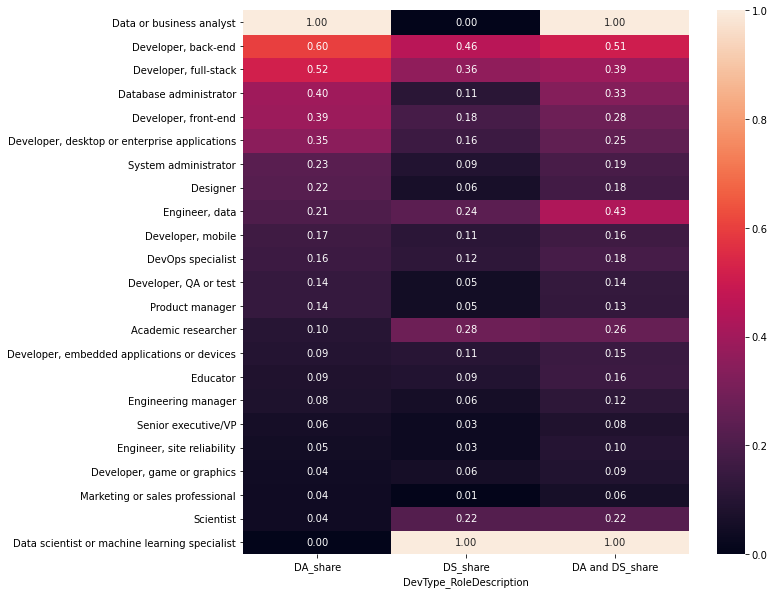

In [154]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc1[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

Analysis for 2-way split with partial overlap (DA, DS)

In [170]:
# Creating a co-occurence table
dfs_cooc2_da = grouping(dfs, all_devtypes, 'Data or business analyst', False)
dfs_cooc2_ds = grouping(dfs, all_devtypes, 'Data scientist or machine learning specialist', False)
dfs_cooc2 = pd.merge(dfs_cooc2_da, 
        dfs_cooc2_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc2 = dfs_cooc2.set_index('Categories')

# Adding a Difference column
dfs_cooc2['Difference'] = dfs_cooc2['Data scientist or machine learning specialist'] - dfs_cooc2['Data or business analyst']

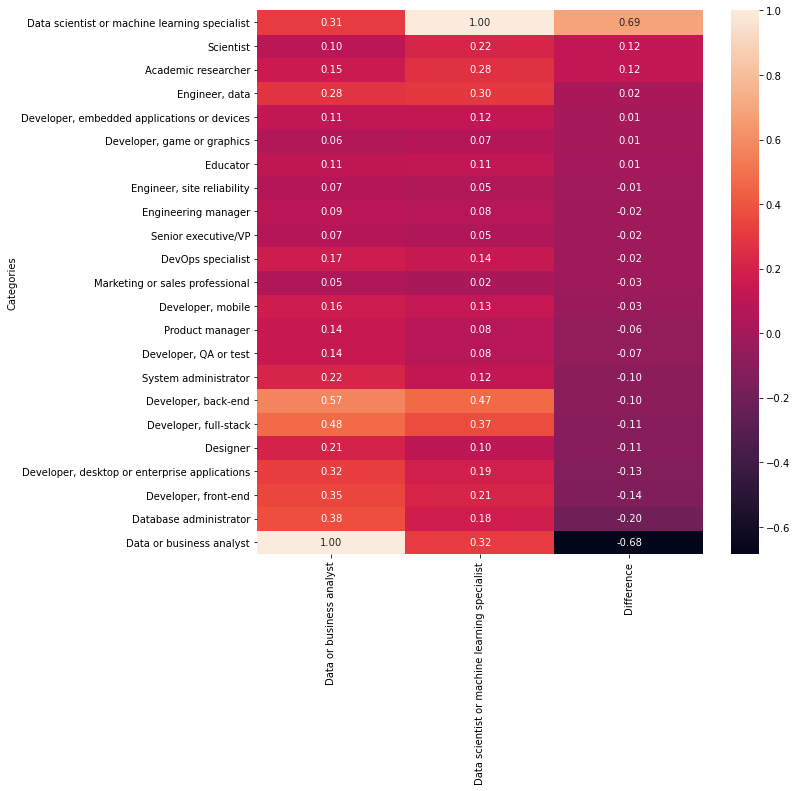

In [171]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc2.sort_values(by=['Difference']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

In [172]:
dfs_cooc2

,Data or business analyst,Data scientist or machine learning specialist,Difference
Categories,,,
DevOps specialist,0.166525,0.142817,-0.023709
"Developer, QA or test",0.142776,0.077359,-0.065417
Senior executive/VP,0.065875,0.050156,-0.015719
System administrator,0.219960,0.124398,-0.095563
Product manager,0.139949,0.075659,-0.064290
Marketing or sales professional,0.048629,0.023519,-0.025109
Database administrator,0.377721,0.180788,-0.196933
"Engineer, data",0.277071,0.297818,0.020747
"Engineer, site reliability",0.065592,0.053556,-0.012036


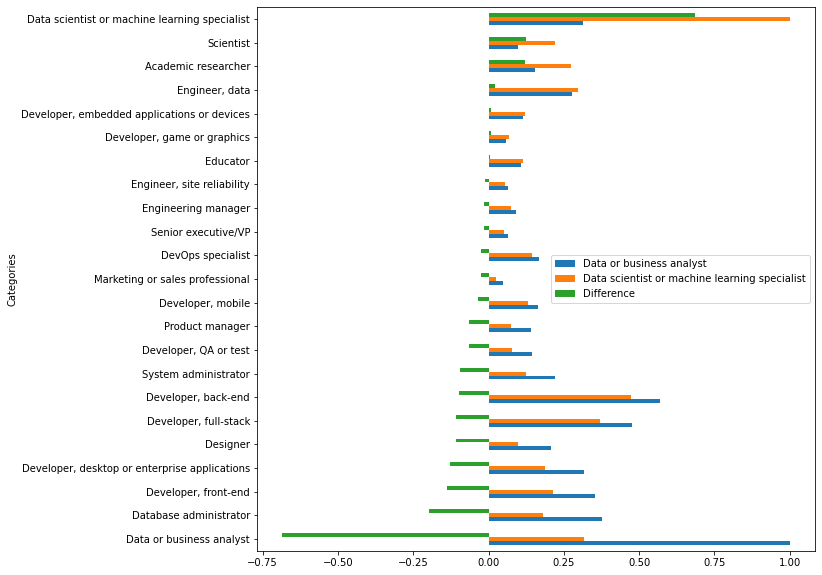

In [173]:
# Creating horizontal bar chart to show differences
plt.rcParams["figure.figsize"] = [10, 10]
dfs_cooc2[['Data or business analyst','Data scientist or machine learning specialist','Difference']].sort_values(by=['Difference']).plot.barh();

## Do tools used by Data Analysts versus Data Scientists differ?

In [40]:
# Listing all columns that refer to tech and tools variables
column_list = ['MiscTechWorkedWith',
               'LanguageWorkedWith',
               'NEWCollabToolsWorkedWith',
               'DatabaseWorkedWith',
               'PlatformWorkedWith',
               'WebframeWorkedWith']

In [51]:
# Creating columns in df for all tools
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_tools, issue_list = dummies(dfs, column_list)

In [54]:
# Creating list with all tools
all_tools = subset_creator(dfs_tools, column_list)

Analysis for 3-way split (DA only, DS only, DA and DS)

In [62]:
# Creating a co-occurence table
dfs_cooc3 = dfs_tools.groupby('DevType_RoleDescription')[all_tools].sum().transpose()

In [83]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc3['DA_share']=dfs_cooc3['DA only']/n_da_only
dfs_cooc3['DA and DS_share']=dfs_cooc3['DA and DS']/n_da_and_ds
dfs_cooc3['DS_share']=dfs_cooc3['DS only']/n_ds_only

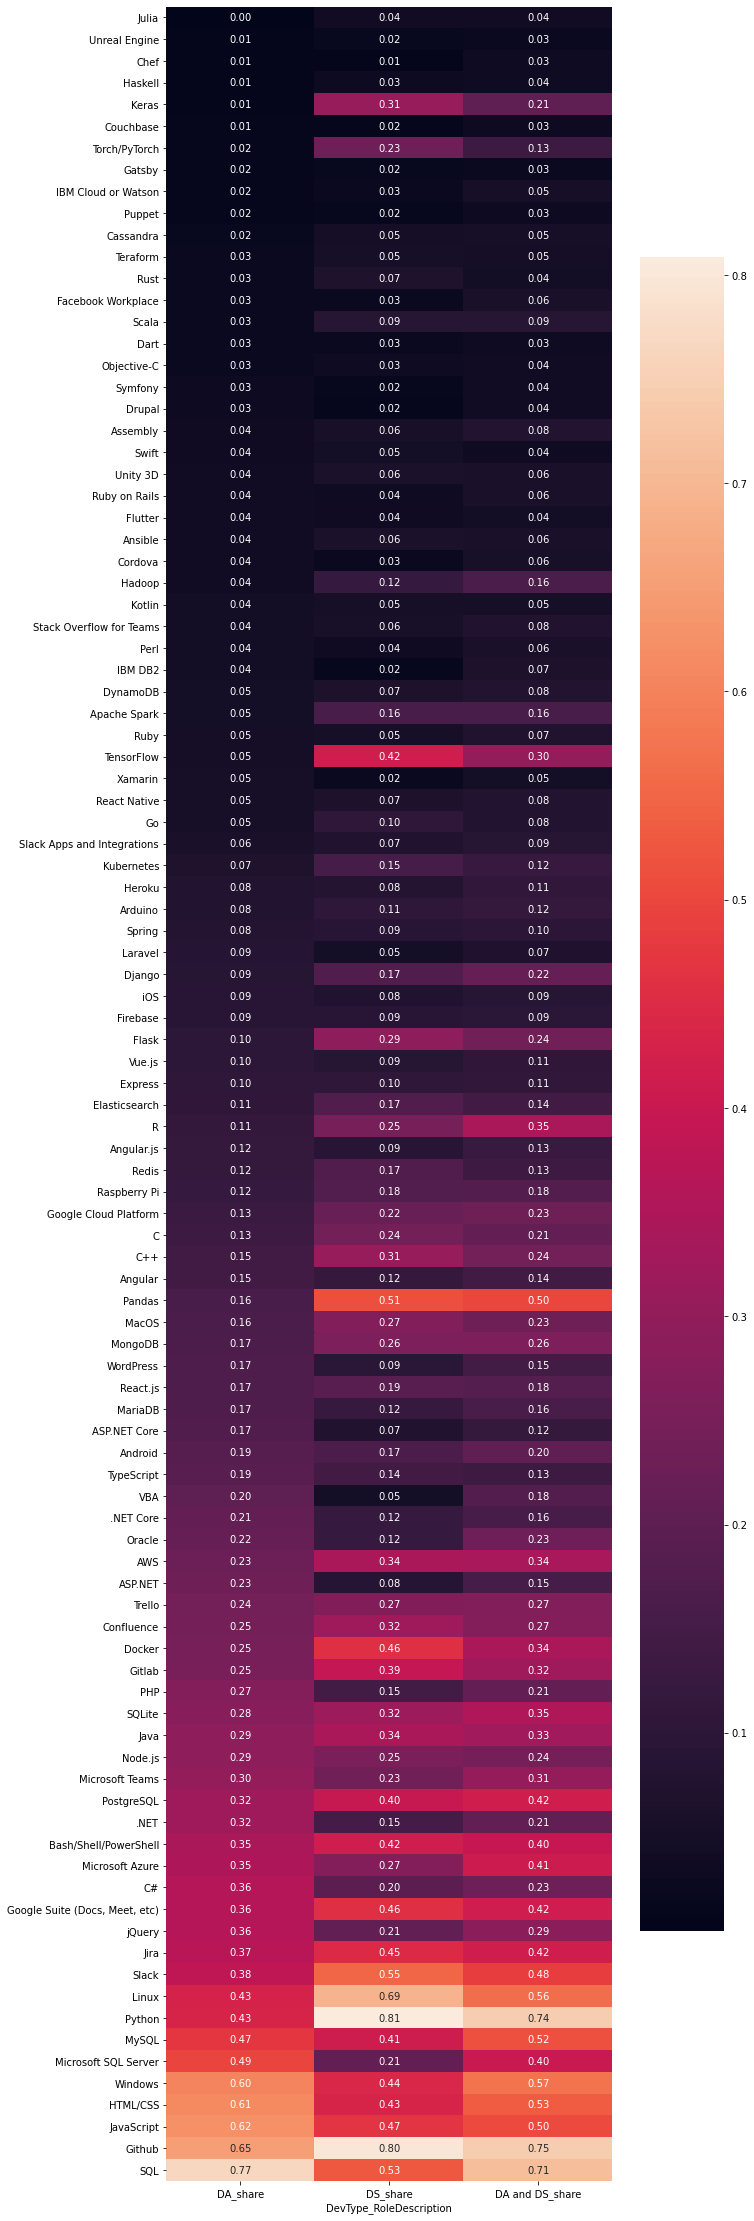

In [158]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,40))
ax=sns.heatmap(dfs_cooc3[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
#ax.set_ylim(0,100);

Analysis for 2-way split with partial overlap (DA, DS)

In [145]:
dfs_cooc4_da = grouping(dfs_tools, all_tools, 'Data or business analyst', True)
dfs_cooc4_ds = grouping(dfs_tools, all_tools, 'Data scientist or machine learning specialist', True)
dfs_cooc4 = pd.merge(dfs_cooc4_da, 
        dfs_cooc4_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc4 = dfs_cooc4.set_index('Categories')

# Adding a difference column
dfs_cooc4['Difference'] = dfs_cooc4['Data scientist or machine learning specialist'] - dfs_cooc4['Data or business analyst']

# Removing tools with low base sizes
min_bs = 100 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst_bs'] > min_bs) | (dfs_cooc4['Data scientist or machine learning specialist_bs'] > min_bs)]

# Removing tools with low endorsement
min_end = 0.3 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst'] > min_end) | (dfs_cooc4['Data scientist or machine learning specialist'] > min_end)]


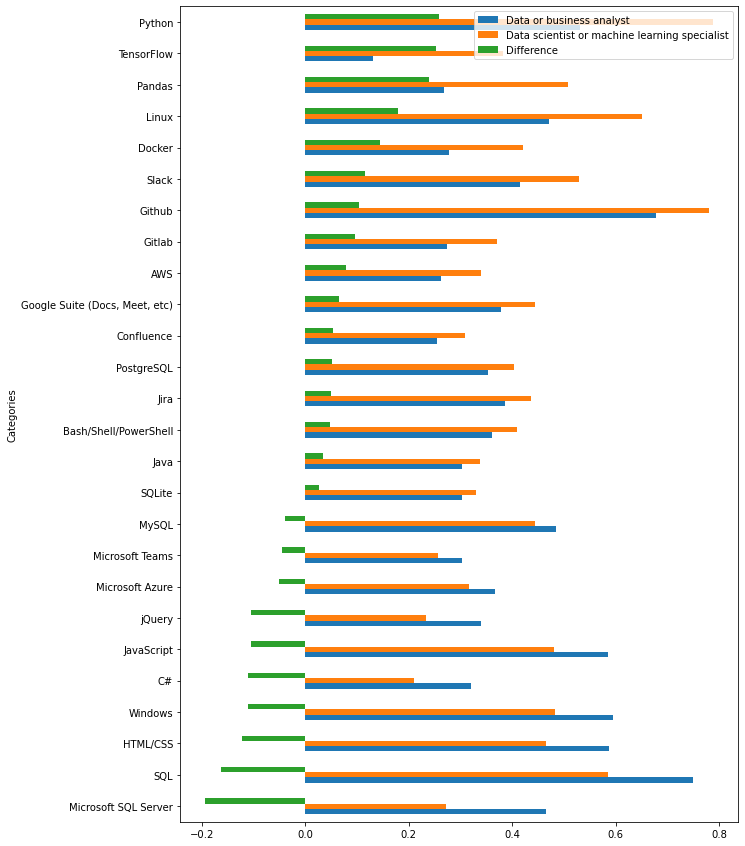

In [149]:
plt.rcParams["figure.figsize"] = [10, 15]
dfs_cooc4[['Data or business analyst','Data scientist or machine learning specialist', 'Difference']].sort_values(by=['Difference']).plot.barh();

## Do tools that Data Analysts and Data Scientists want to learn differ?

In [159]:
# Listing all columns that refer to tech and tools variables FOR LEARNING
column_list_dny = ['MiscTechDesireNextYear',
               'LanguageDesireNextYear',
               'NEWCollabToolsDesireNextYear',
               'DatabaseDesireNextYear',
               'PlatformDesireNextYear',
               'WebframeDesireNextYear']

In [160]:
# Creating columns in df for all tools
dfs_tools_dny, issue_list_dny = dummies(dfs, column_list_dny)

In [161]:
# Creating list with all tools
all_tools_dny = subset_creator(dfs_tools_dny, column_list_dny)

Analysis for 3-way split (DA only, DS only, DA and DS)

In [162]:
# Creating a co-occurence table
dfs_cooc5 = dfs_tools_dny.groupby('DevType_RoleDescription')[all_tools_dny].sum().transpose()

In [163]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc5['DA_share']=dfs_cooc5['DA only']/n_da_only
dfs_cooc5['DA and DS_share']=dfs_cooc5['DA and DS']/n_da_and_ds
dfs_cooc5['DS_share']=dfs_cooc5['DS only']/n_ds_only

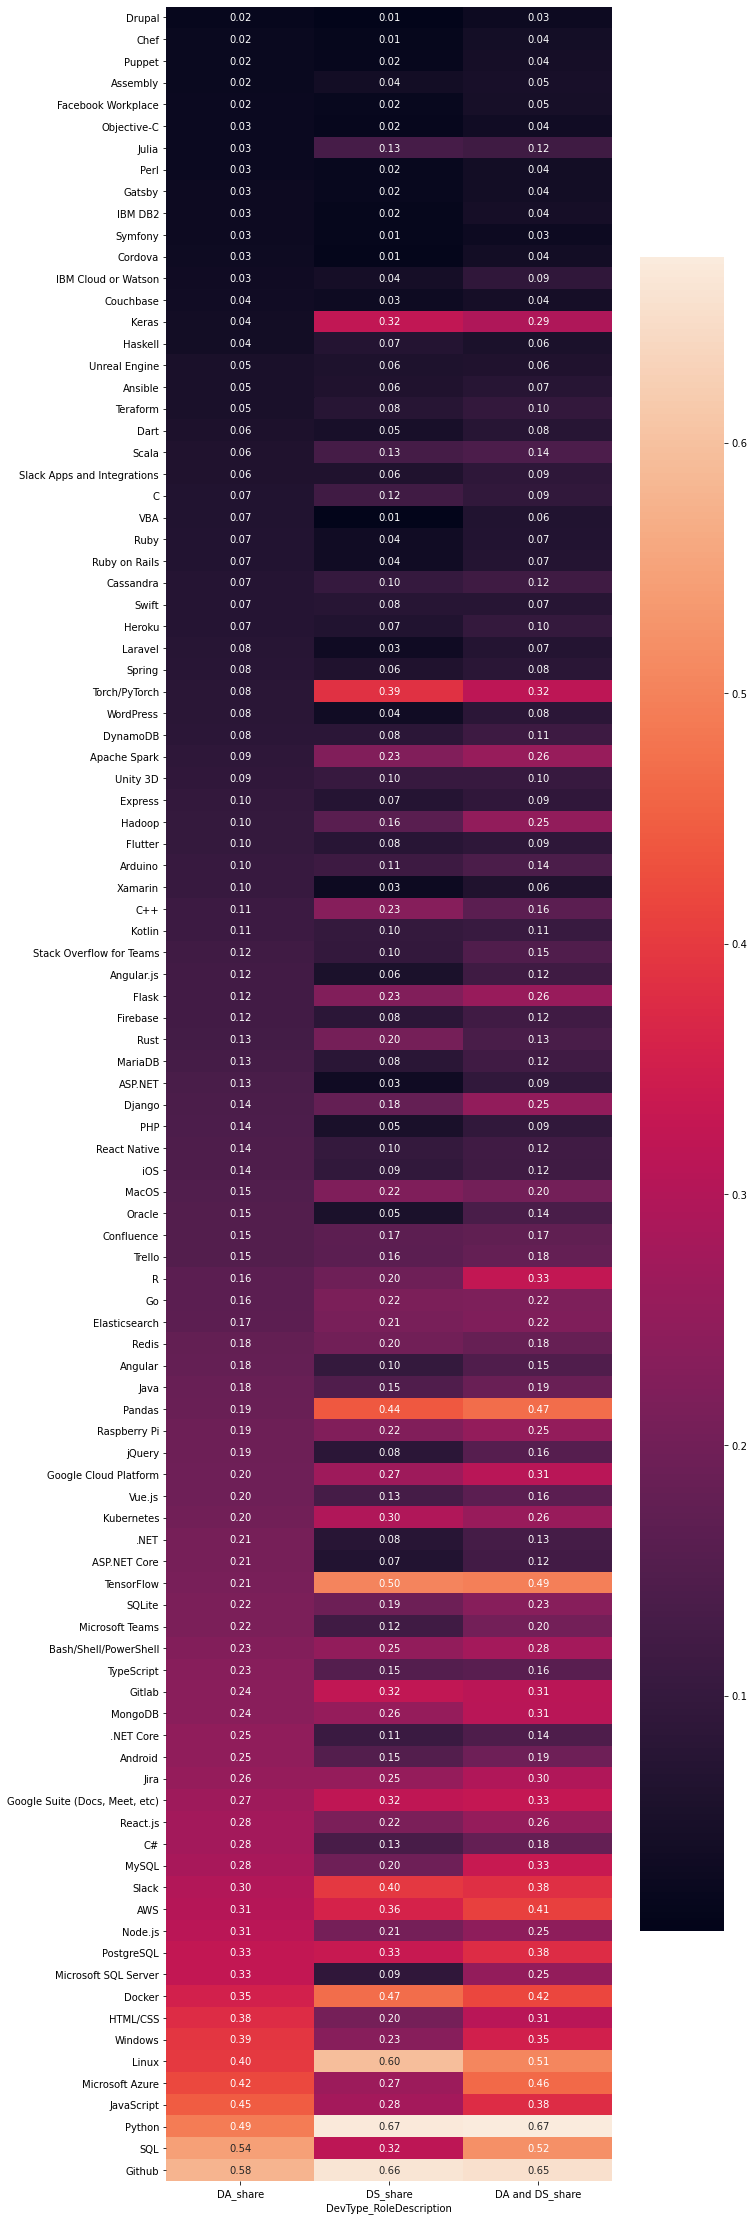

In [164]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,40))
ax=sns.heatmap(dfs_cooc5[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
#ax.set_ylim(0,100);

Analysis for 2-way split with partial overlap (DA, DS)

In [165]:
dfs_cooc5_da = grouping(dfs_tools_dny, all_tools_dny, 'Data or business analyst', True)
dfs_cooc5_ds = grouping(dfs_tools_dny, all_tools_dny, 'Data scientist or machine learning specialist', True)
dfs_cooc5 = pd.merge(dfs_cooc5_da, 
        dfs_cooc5_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc5 = dfs_cooc5.set_index('Categories')

# Adding a difference column
dfs_cooc5['Difference'] = dfs_cooc5['Data scientist or machine learning specialist'] - dfs_cooc5['Data or business analyst']

# Removing tools with low base sizes
min_bs = 100 # adjust as desired
dfs_cooc5 = dfs_cooc5.loc[(dfs_cooc5['Data or business analyst_bs'] > min_bs) | (dfs_cooc5['Data scientist or machine learning specialist_bs'] > min_bs)]

# Removing tools with low endorsement
min_end = 0.3 # adjust as desired
dfs_cooc5 = dfs_cooc5.loc[(dfs_cooc5['Data or business analyst'] > min_end) | (dfs_cooc5['Data scientist or machine learning specialist'] > min_end)]


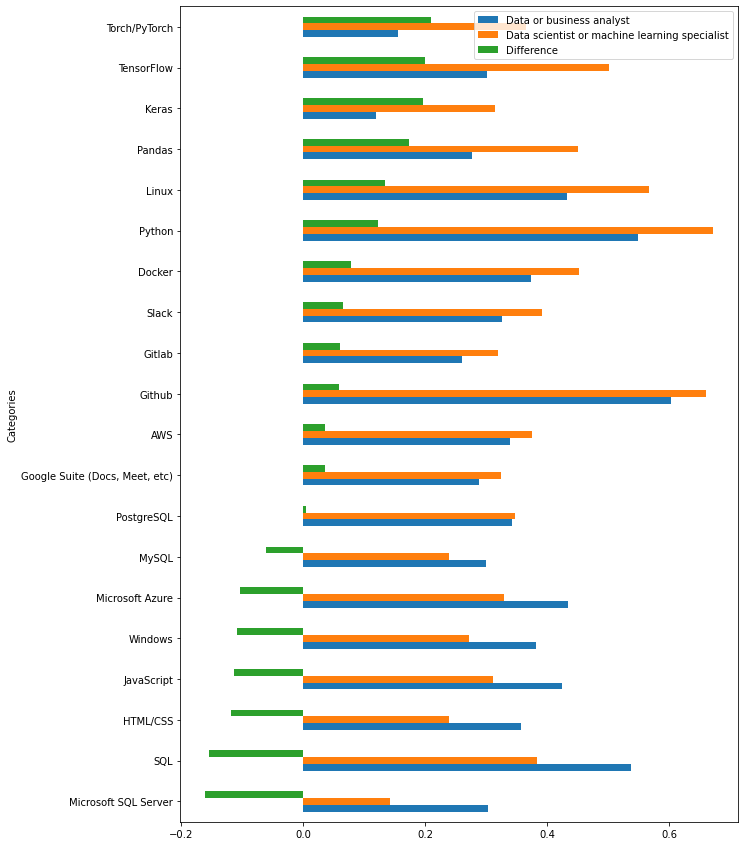

In [166]:
plt.rcParams["figure.figsize"] = [10, 15]
dfs_cooc5[['Data or business analyst','Data scientist or machine learning specialist', 'Difference']].sort_values(by=['Difference']).plot.barh();